In [1]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
plt.style.use("ggplot")

In [3]:
X_numpy, y_numpy = datasets.make_regression(n_samples = 1000, n_features = 1, noise = 20, random_state = 1)

In [4]:
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32)).view(-1, 1)

In [5]:
X, y

(tensor([[-1.0679e+00],
         [-2.9159e-01],
         [ 5.0808e-02],
         [ 6.2180e-01],
         [-5.4577e-01],
         [ 1.5550e+00],
         [-2.0975e-01],
         [ 1.7898e+00],
         [-7.6780e-01],
         [ 1.4707e+00],
         [-2.8638e-01],
         [-3.6454e-01],
         [ 4.0349e-01],
         [ 3.3722e-01],
         [ 8.6464e-02],
         [-1.6742e+00],
         [-9.2432e-02],
         [ 5.2058e-01],
         [ 1.4609e+00],
         [-9.1542e-01],
         [-1.6120e-01],
         [ 1.5755e+00],
         [ 7.4488e-01],
         [ 1.0450e+00],
         [-2.7910e+00],
         [-7.4716e-01],
         [-1.1171e+00],
         [-1.0903e+00],
         [ 8.5987e-01],
         [ 1.9092e-01],
         [-3.3128e-01],
         [-4.2348e-01],
         [ 3.1966e-01],
         [-1.9450e+00],
         [-8.8058e-01],
         [ 8.3863e-01],
         [-1.5645e+00],
         [ 8.1604e-01],
         [-7.3327e-01],
         [ 6.4099e-01],
         [-6.7410e-02],
         [-2.301

In [6]:
n_samples, n_features = X.shape

In [7]:
n_samples, n_features

(1000, 1)

In [8]:
input_size = n_features
output_size = y.shape[1]

In [9]:
input_size, output_size

(1, 1)

In [10]:
model = nn.Linear(input_size, output_size)

In [11]:
criterion = nn.MSELoss()

In [12]:
learning_rate = 0.01

In [13]:
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [14]:
epochs = 1000

In [15]:
for epoch in range(1, epochs + 1):
    # forward pass
    predictions = model(X)
    loss = criterion(predictions, y)
    
    # backward pass
    loss.backward()

    # update weights
    optimizer.step()

    # set the gradients to zero
    optimizer.zero_grad()

    weight, bias = model.parameters()
    
    if epoch % 100 == 0:
        print(f"Epoch # {epoch}")
        print(f"Loss: {loss:.3f}")
        print(f"Weight: {weight[0][0].item():.3f}")
        print(f"Bias: {bias[0].item():.3f}")
        print()

Epoch # 100
Loss: 431.229
Weight: 32.817
Bias: 0.965

Epoch # 200
Loss: 402.207
Weight: 37.474
Bias: 0.691

Epoch # 300
Loss: 401.599
Weight: 38.144
Bias: 0.604

Epoch # 400
Loss: 401.587
Weight: 38.241
Bias: 0.585

Epoch # 500
Loss: 401.586
Weight: 38.255
Bias: 0.582

Epoch # 600
Loss: 401.586
Weight: 38.257
Bias: 0.581

Epoch # 700
Loss: 401.586
Weight: 38.258
Bias: 0.581

Epoch # 800
Loss: 401.586
Weight: 38.258
Bias: 0.581

Epoch # 900
Loss: 401.586
Weight: 38.258
Bias: 0.581

Epoch # 1000
Loss: 401.586
Weight: 38.258
Bias: 0.581



In [16]:
predictions = model(X).detach()

In [17]:
predictions

tensor([[-4.0273e+01],
        [-1.0575e+01],
        [ 2.5248e+00],
        [ 2.4370e+01],
        [-2.0299e+01],
        [ 6.0072e+01],
        [-7.4436e+00],
        [ 6.9053e+01],
        [-2.8793e+01],
        [ 5.6848e+01],
        [-1.0375e+01],
        [-1.3365e+01],
        [ 1.6018e+01],
        [ 1.3482e+01],
        [ 3.8889e+00],
        [-6.3470e+01],
        [-2.9552e+00],
        [ 2.0497e+01],
        [ 5.6471e+01],
        [-3.4441e+01],
        [-5.5861e+00],
        [ 6.0855e+01],
        [ 2.9079e+01],
        [ 4.0560e+01],
        [-1.0620e+02],
        [-2.8003e+01],
        [-4.2157e+01],
        [-4.1133e+01],
        [ 3.3478e+01],
        [ 7.8850e+00],
        [-1.2093e+01],
        [-1.5620e+01],
        [ 1.2810e+01],
        [-7.3832e+01],
        [-3.3108e+01],
        [ 3.2665e+01],
        [-5.9273e+01],
        [ 3.1801e+01],
        [-2.7472e+01],
        [ 2.5104e+01],
        [-1.9979e+00],
        [-8.7470e+01],
        [-3.2225e+01],
        [-2

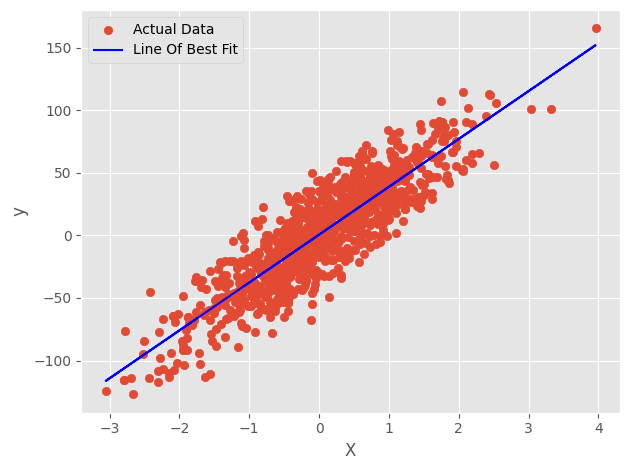

In [18]:
plt.scatter(X, y, label = "Actual Data")
plt.plot(X, predictions, color = "blue", label = "Line Of Best Fit")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.tight_layout()
plt.show()